In [ ]:
# Creating a table which features the genes (coding regions) present
# for each strain with increased coverage at the beginning on Chromosome
# CP034458, including the depth of coverage at each position


In [3]:
import os
print(os.getcwd())

/Users/evaedwards


In [8]:
import os
os.chdir('/Users/evaedwards/Final-Year-Project/Datasets/TXT')
print(os.getcwd())

/Users/evaedwards/Final-Year-Project/Datasets/TXT


In [12]:
import pandas as pd
import glob

# Define input and output file paths
input_files = glob.glob("CH58/*.txt")  # Adjust to match your directory
output_folder = "filtered_data/"  # Folder to store filtered files
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Process each file
for file in input_files:
    strain_name = os.path.basename(file).replace(".txt", "")  # Extract strain name
    
    # Load the coverage data (assuming tab-separated format, no headers)
    df = pd.read_csv(file, sep="\t", header=None, names=["Chromosome", "Position", "Coverage"])
    
    # Filter only for CP034458 and positions 0-350,000
    df_filtered = df[(df["Chromosome"] == "CP034458") & (df["Position"] >= 0) & (df["Position"] <= 1150000)]
    
    # Save the filtered data
    output_file = os.path.join(output_folder, f"{strain_name}_CH58short.txt")
    df_filtered.to_csv(output_file, sep="\t", index=False, header=False)
    
    print(f"Saved filtered data for {strain_name} to {output_file}")



Saved filtered data for WS4 to filtered_data/WS4_CH58short.txt
Saved filtered data for jog1 to filtered_data/jog1_CH58short.txt
Saved filtered data for jog2 to filtered_data/jog2_CH58short.txt
Saved filtered data for jog3 to filtered_data/jog3_CH58short.txt
Saved filtered data for mat20 to filtered_data/mat20_CH58short.txt
Saved filtered data for jog7 to filtered_data/jog7_CH58short.txt
Saved filtered data for mat19 to filtered_data/mat19_CH58short.txt
Saved filtered data for PP8 to filtered_data/PP8_CH58short.txt
Saved filtered data for NW28 to filtered_data/NW28_CH58short.txt
Saved filtered data for jog5 to filtered_data/jog5_CH58short.txt
Saved filtered data for PP4 to filtered_data/PP4_CH58short.txt
Saved filtered data for NW19 to filtered_data/NW19_CH58short.txt
Saved filtered data for NW30 to filtered_data/NW30_CH58short.txt
Saved filtered data for NW32 to filtered_data/NW32_CH58short.txt


In [22]:
# Checking it has worked
df = pd.read_csv("filtered_data/WS4_CH58short.txt", sep="\t", header=None, names=["Chromosome", "Position", "Coverage"])

# Display the first 5 rows
print(df.head())

  Chromosome  Position  Coverage
0   CP034458         1       152
1   CP034458         2       213
2   CP034458         3       216
3   CP034458         4       227
4   CP034458         5       243


In [12]:
# Step 2: Make the appropraite gbk file for the Chromosome ..58 and to the
# correct position

from Bio import SeqIO
import pandas as pd

genbank_file = "GCA_004217705.1_ASM421770v1_genomic-1.gbk"
record_id = "CP034458.1"

# Initialize an empty list to store the gene information
gene_data = []

# Parse the GenBank file and find the specific record by ID
with open(genbank_file, "r") as handle:
    for record in SeqIO.parse(handle, "genbank"):
        if record.id == record_id:
            # Extract the CDS (coding region) annotations
            for feature in record.features:
                if feature.type == "CDS":
                    start_position = int(feature.location.start)
                    end_position = int(feature.location.end)

                    # Filter to only include genes that start at ≤ 1,150,000
                    if start_position <= 1150000:
                        gene_info = {
                            "Product": feature.qualifiers.get("product", ["unknown"])[0],  # Use Product, fallback to "unknown"
                            "Start Position": start_position,  # Start position of CDS
                            "End Position": end_position,      # End position of CDS
                            "Strand": "+" if feature.strand == 1 else "-"  # Strand direction
                        }
                        gene_data.append(gene_info)

# Create a DataFrame from the filtered gene data
df = pd.DataFrame(gene_data)

# Display the table
print(df)

# Save the filtered table to a CSV file
df.to_csv("AnnotatedGenome_CP58_short.csv", index=False)



/opt/anaconda3/lib/python3.12/site-packages/Bio/SeqFeature.py:231: BiopythonDeprecationWarning: Please use .location.strand rather than .strand
  warnings.warn(


                                               Product  Start Position  \
0    Hyphally regulated cell wall GPI-anchored prot...           27681   
1      Hyphally regulated cell wall protein N-terminal           46148   
2           small oligopeptide transporter, OPT family           58599   
3           Pimeloyl-ACP methyl ester carboxylesterase           61437   
4                                 hypothetical protein           62794   
..                                                 ...             ...   
390                           DNA repair protein RAD50         1134154   
391                              C2H2-type zinc finger         1138706   
392                               hypothetical protein         1142783   
393  DNA-directed RNA polymerase I and III subunit ...         1146170   
394               ATP-dependent RNA helicase DDX5/DBP2         1147831   

     End Position Strand  
0           38832      -  
1           50885      -  
2           61146      +  
3  

In [22]:
# Combining the depth of coverage and annotated genome for the 14 strains
# resulting in a final tableu

import pandas as pd
import glob

import os
os.chdir('/Users/evaedwards/Final-Year-Project/Datasets/TXT')
print(os.getcwd())

# Load the annotated genome file (genes with start & end positions)
genes_df = pd.read_csv("AnnotatedGenome_CP58_short.csv")

# Get list of all strain coverage files (filtered 0-350,000 positions)
coverage_files = glob.glob("filtered_data/*.txt")  # Adjust path if needed

# Create an empty list to store final data
final_data = []

# Process each strain's coverage file
for file in coverage_files:
    strain_name = os.path.basename(file).split("_")[0]  # Extract strain name before first "_"
    strain_name = strain_name.upper()  # Capitalize strain name (e.g., "JOG2")
    
    # Load coverage data
    coverage_df = pd.read_csv(file, sep="\t", header=None, names=["Chromosome", "Position", "Coverage"])
    
    # Process each gene
    for _, gene in genes_df.iterrows():
        gene_name = gene["Product"]
        start_pos = gene["Start Position"]
        end_pos = gene["End Position"]
        
        # Get coverage at start and end positions
        start_coverage = coverage_df.loc[coverage_df["Position"] == start_pos, "Coverage"]
        end_coverage = coverage_df.loc[coverage_df["Position"] == end_pos, "Coverage"]
        
        # Convert to integers (or use NaN if not found)
        start_coverage = int(start_coverage.values[0]) if not start_coverage.empty else None
        end_coverage = int(end_coverage.values[0]) if not end_coverage.empty else None
        
        # Store result
        final_data.append([strain_name, gene_name, start_pos, end_pos, start_coverage, end_coverage])

# Convert to DataFrame
final_df = pd.DataFrame(final_data, columns=["Strain", "Product", "Start Position", "End Position", "Start Coverage", "End Coverage"])

# Display result
print(final_df.head())

# Save final table
final_df.to_csv("Table_CH58short_annotated.csv", index=False)


/Users/evaedwards/Final-Year-Project/Datasets/TXT
  Strain                                            Product  Start Position  \
0    PP8  Hyphally regulated cell wall GPI-anchored prot...           27681   
1    PP8    Hyphally regulated cell wall protein N-terminal           46148   
2    PP8         small oligopeptide transporter, OPT family           58599   
3    PP8         Pimeloyl-ACP methyl ester carboxylesterase           61437   
4    PP8                               hypothetical protein           62794   

   End Position  Start Coverage  End Coverage  
0         38832             374         257.0  
1         50885             232         285.0  
2         61146             215         336.0  
3         62331             252         276.0  
4         63580             246         274.0  


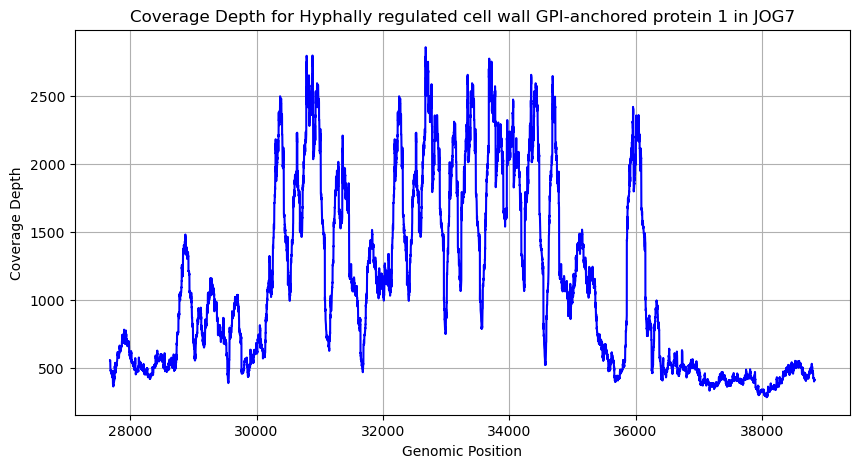

In [46]:
# Exploring unique genes and coverage across starins - Hyphally regulated cell wall GPI-anchored protein 1


import pandas as pd
import matplotlib.pyplot as plt

# Load the gene annotation table
genes_df = pd.read_csv("Table_CH58short_annotated.csv")  # Adjust filename if different

# Load the coverage depth file for a chosen strain (e.g., PP8)
strain_name = "JOG7"
coverage_file = f"filtered_data/{strain_name}_CH58short.txt"  # Adjust if needed
coverage_df = pd.read_csv(coverage_file, sep="\t", header=None, names=["Chromosome", "Position", "Coverage"])

# Choose a product to visualize (e.g., "Hyphally regulated cell wall GPI-anchored protein 1")
product_name = "Hyphally regulated cell wall GPI-anchored protein 1"

# Get the start and end positions for this gene
gene_info = genes_df[(genes_df["Strain"] == strain_name) & (genes_df["Product"] == product_name)].iloc[0]
start_pos, end_pos = gene_info["Start Position"], gene_info["End Position"]

# Filter coverage data for the gene region
gene_coverage_df = coverage_df[(coverage_df["Position"] >= start_pos) & (coverage_df["Position"] <= end_pos)]

# Plot coverage depth
plt.figure(figsize=(10, 5))
plt.plot(gene_coverage_df["Position"], gene_coverage_df["Coverage"], color="blue", linestyle="-", linewidth=1.5)
plt.xlabel("Genomic Position")
plt.ylabel("Coverage Depth")
plt.title(f"Coverage Depth for {product_name} in {strain_name}")
plt.grid(True)
plt.show()


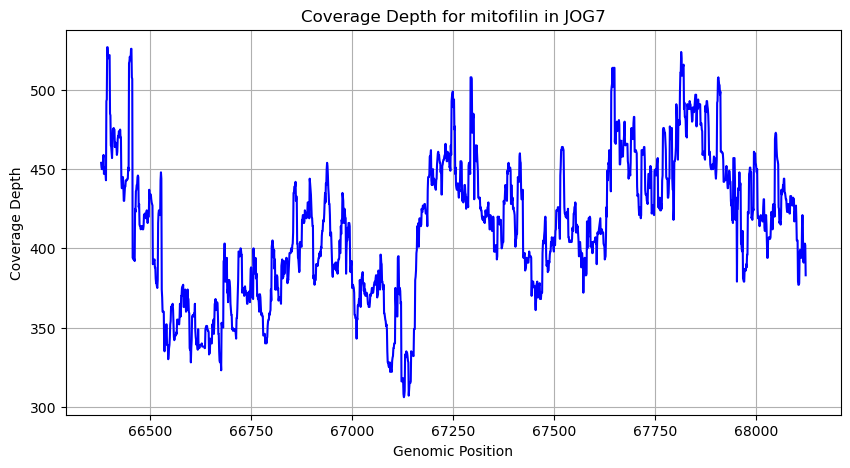

In [44]:
# Exploring unique genes and coverage across starins - Mitofilin


import pandas as pd
import matplotlib.pyplot as plt

# Load the gene annotation table
genes_df = pd.read_csv("Table_CH58short_annotated.csv")  # Adjust filename if different

# Load the coverage depth file for strain of interest 
strain_name = "JOG7" # Change as appropriate
coverage_file = f"filtered_data/{strain_name}_CH58short.txt" 
coverage_df = pd.read_csv(coverage_file, sep="\t", header=None, names=["Chromosome", "Position", "Coverage"])

# Choose a product to visualize
product_name = "mitofilin"

# Get the start and end positions for this gene
gene_info = genes_df[(genes_df["Strain"] == strain_name) & (genes_df["Product"] == product_name)].iloc[0]
start_pos, end_pos = gene_info["Start Position"], gene_info["End Position"]

# Filter coverage data for the gene region
gene_coverage_df = coverage_df[(coverage_df["Position"] >= start_pos) & (coverage_df["Position"] <= end_pos)]

# Plot coverage depth
plt.figure(figsize=(10, 5))
plt.plot(gene_coverage_df["Position"], gene_coverage_df["Coverage"], color="blue", linestyle="-", linewidth=1.5)
plt.xlabel("Genomic Position")
plt.ylabel("Coverage Depth")
plt.title(f"Coverage Depth for {product_name} in {strain_name}")
plt.grid(True)
plt.show()